In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import os
import librosa as lr
import shutil

from skimage.io import imread
import h5py
import glob
from sklearn.utils import shuffle

from keras.models import Model, load_model
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.layers import Dropout, Input, BatchNormalization
from keras.optimizers import Nadam
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils


Using TensorFlow backend.


In [2]:
in_dim = (192,192,1)
out_dim = 176
batch_size = 32
wav_path = 'data/roller_test/'
tr_path = 'data/roller_test_tr/train_wav/'
va_path = 'data/roller_test_va/valid_wav/'
te_path = 'data/roller_test_te/test_wav/'
data_size = 66176
tr_size = 52800
va_size = 4576
te_size = 8800

In [3]:
import os
def wav_to_img(path, height=192, width=192):
    signal, sr = lr.load(path, res_type='kaiser_fast')
    hl = signal.shape[0]//(width*1.1) #this will cut away 5% from start and end
    spec = lr.feature.melspectrogram(signal, n_mels=height, hop_length=int(hl))
    img = lr.logamplitude(spec)**2
    start = (img.shape[1] - width) // 2
    return img[:, start:start+width]



def process_audio(in_folder, out_folder, sub_folder):
    
    os.makedirs(os.path.join(out_folder, 'train_wav/' + sub_folder), exist_ok=True)
    os.makedirs(os.path.join(out_folder, 'valid_wav/' + sub_folder), exist_ok=True)
    os.makedirs(os.path.join(out_folder, 'test_wav/' + sub_folder), exist_ok=True)
    files = shuffle(glob.glob(in_folder+'*.wav'))
    numb_files = len(files)
    num_train =int( 0.6*numb_files)
    num_test = int(0.2*numb_files)
    num_valid = int(0.2*numb_files)
    train, test, valid = files[:num_train],files[num_train:num_train+num_test], files[num_train+num_test:]
    start = len(in_folder)
    images = []
    for file in train:
        img = wav_to_img(file)
        images.append(img)
    return (images)
    
def process_audio_with_classes(in_folder, out_folder, labels):
    os.makedirs(out_folder, exist_ok=True)
    for i in range(len(labels['Sample Filename'])):
        file = labels['Sample Filename'][i]
        lang = labels['Language'][i]
        os.makedirs(out_folder + lang, exist_ok=True)
        img = mp3_to_img(in_folder+file)
        sp.misc.imsave(out_folder + lang + '/' + file + '.jpg', img)

In [5]:
import matplotlib.pyplot as pl
%matplotlib inline

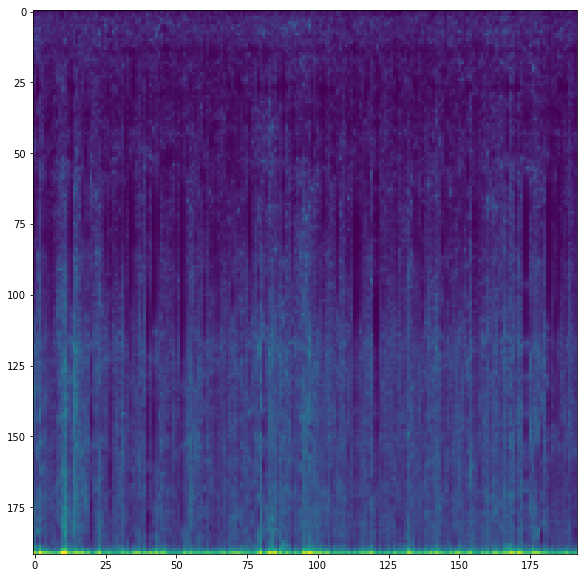

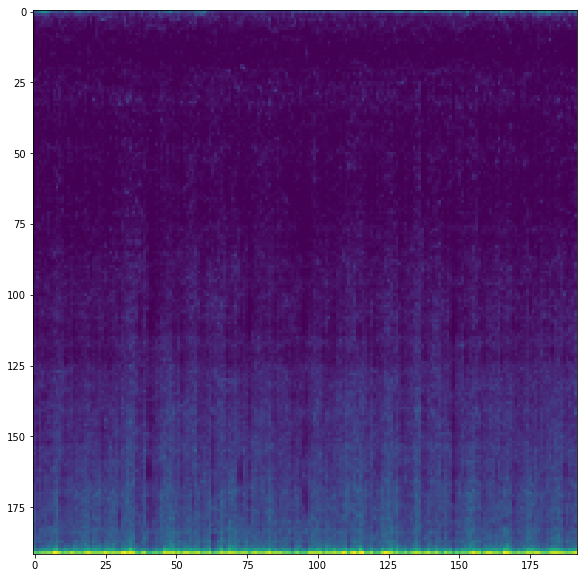

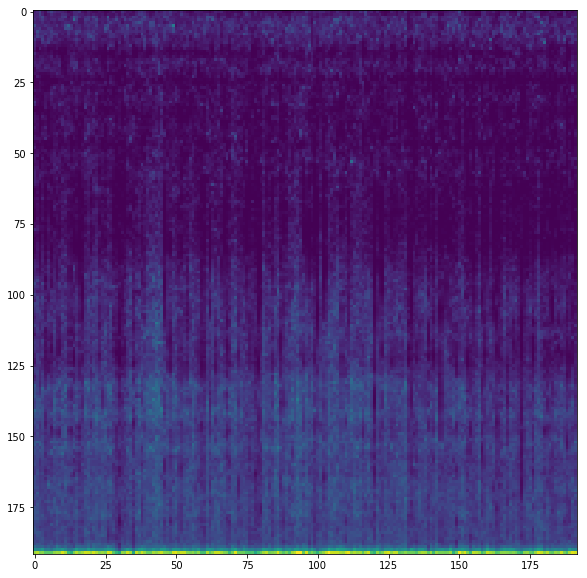

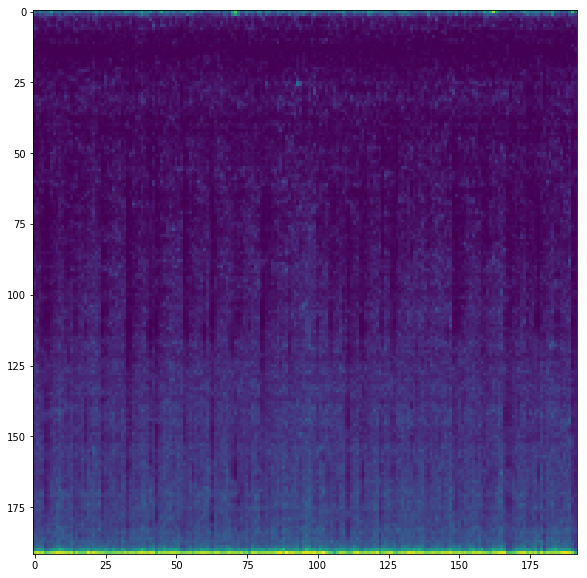

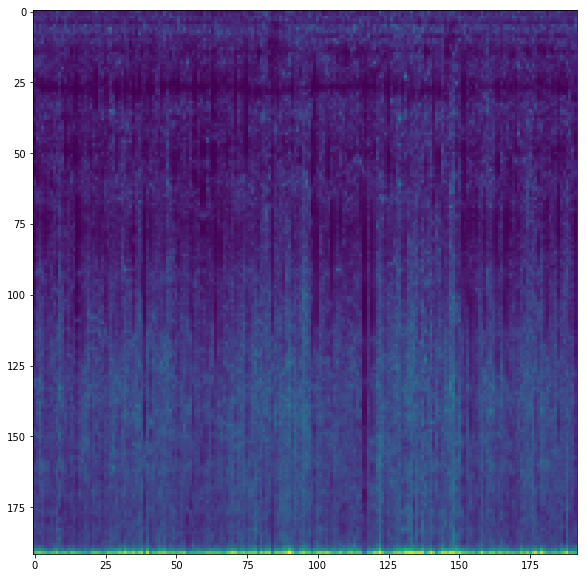

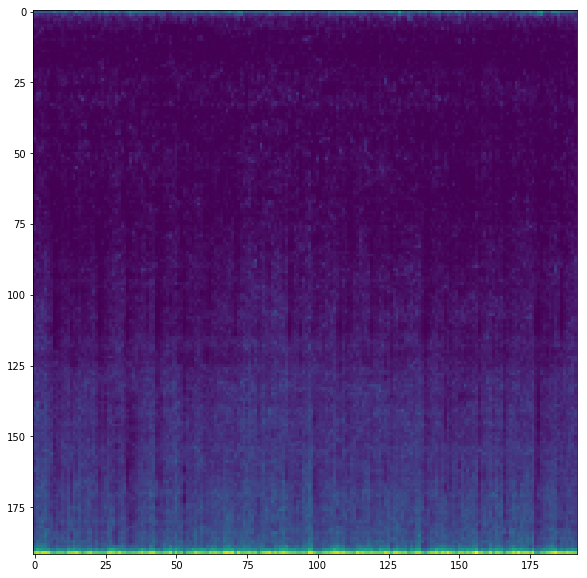

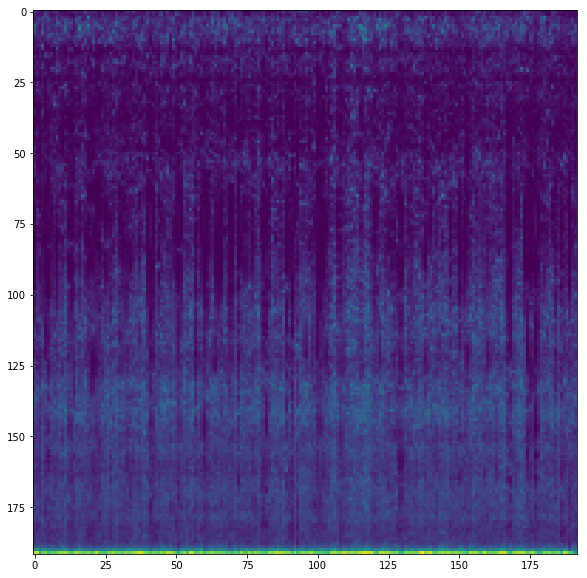

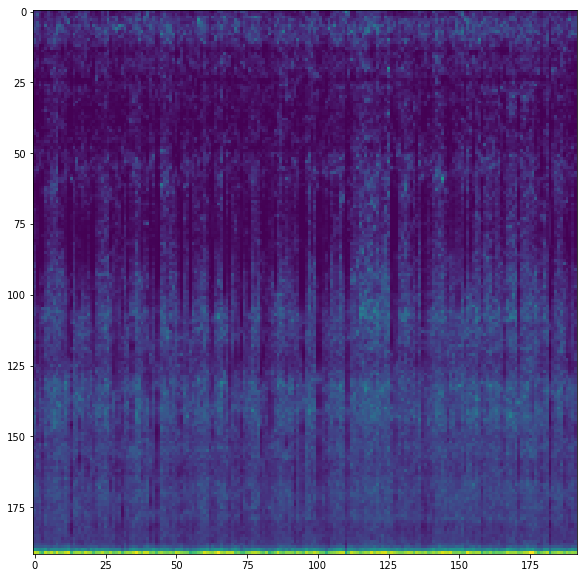

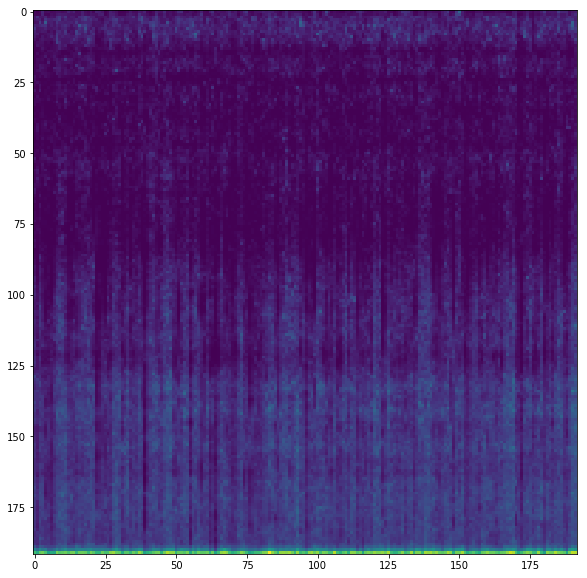

In [ ]:

files = shuffle(glob.glob('data/liners/with/'+'*.wav'))
numb_files = len(files)
num_train =int( 0.6*numb_files)
num_test = int(0.2*numb_files)
num_valid = int(0.2*numb_files)
train = files[:num_train]
images = []
for file in train[1:100]:
    img = wav_to_img(file)
    images.append(img)


for i in images[1:10]:
    pl.figure(figsize=(10,10))
    pl.imshow(i)

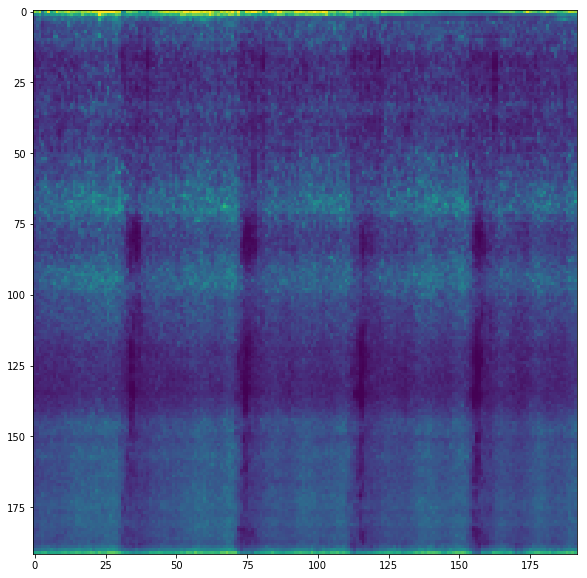

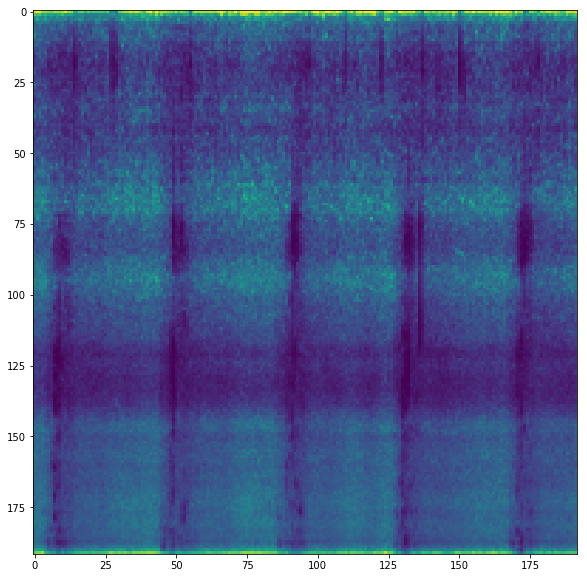

In [ ]:

files = shuffle(glob.glob('data/liners/without/'+'*.wav'))
numb_files = len(files)
num_train =int( 0.6*numb_files)
num_test = int(0.2*numb_files)
num_valid = int(0.2*numb_files)
train = files[:num_train]
images = []
for file in train[1:100]:
    img = wav_to_img(file)
    images.append(img)


for i in images[1:10]:
    pl.figure(figsize=(10,10))
    pl.imshow(i)